In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


In [3]:
# load the dataset
data=pd.read_csv("Mall_Customers.csv")

In [4]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
# iloc method to extract the features from the dataset

x=data.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

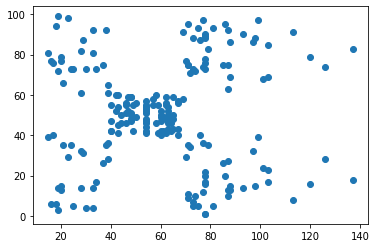

In [6]:
# plot the data
plt.scatter(x[:,0],x[:,1])
plt.show()

In [8]:
# to find the number of clusters WCSS(inertia) where we plot the elbow graph

wcss=[]
for i in range(1,11): #trail and error 
    k=KMeans(n_clusters=i,init="k-means++",random_state=0)
    k.fit(x)
    wcss.append(k.inertia_)

In [9]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

Text(0, 0.5, 'wcss')

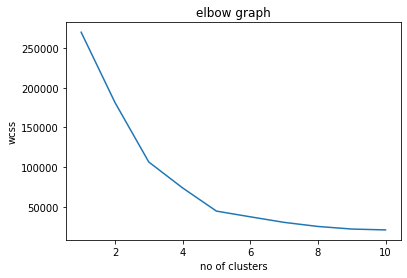

In [10]:
# plot the graph by taking iteration values and wcss

plt.plot(range(1,11),wcss)
#plt.scatter(range(1,11),wcss='r')
plt.title("elbow graph")
plt.xlabel("no of clusters")
plt.ylabel("wcss")

### by looking in to the elbow graph the actual clusters we requried k=5

In [12]:
# let us find which datapoint belong to which cluster

k=KMeans(n_clusters=5,init="k-means++",random_state=0)
y=k.fit_predict(x) # load data to predict the cluster for the data points
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [13]:
# positions of the centroids

k.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

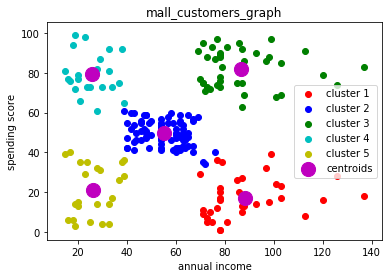

In [15]:
# plot the final graph

plt.scatter(x[y==0,0],x[y==0,1],c='r',label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],c='b',label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],c='g',label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],c='c',label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],c='y',label='cluster 5')
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],s=200,c='m',label="centroids")
plt.title("mall_customers_graph")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()

# interpretation of the graph

. cluster 5: less salary and less spending score//
. cluster 4: less salary and high spending score//
.cluster 2: average salary and average spending score//
.cluster 3:high salary and high spending score//
. cluster 1: high salary and less spending score//